This notebook explores Metropolis-Hasting in Monte Carlo integration using Python.

Date Created: 29 Oct 2018
<br>
Last Modified: 2 Nov 2018 
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 0.0 A bit of history

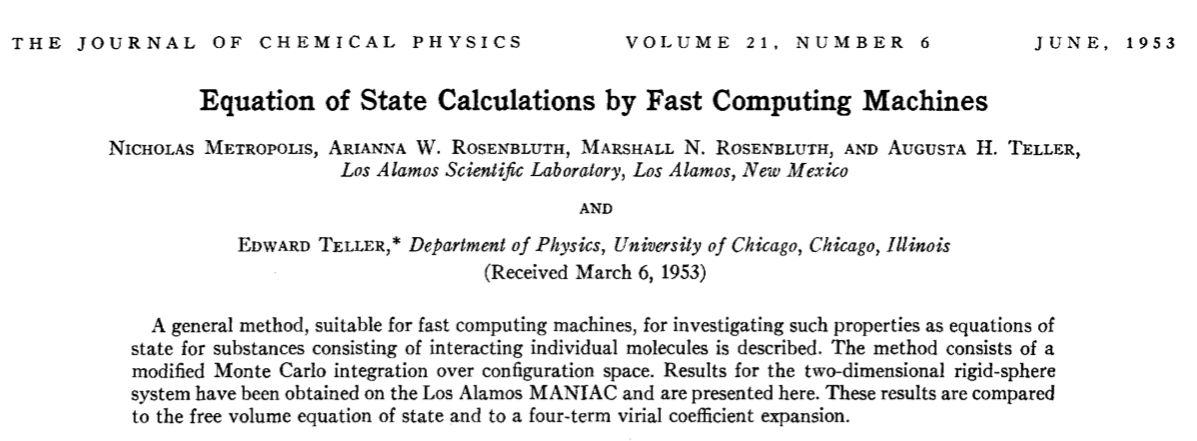

In [3]:
from IPython.display import Image
Image(filename='images/MRRTT.png', width=800)

# 1.0 The Algorithm

1. Choose a starting state.
2. Choose a move uniformly randomly from a set of moves.
3. Calculate the acceptance probability $P_a$.
4. Accept or reject moves with probability $P_a$.
5. Calculate and store value of interest.
6. Go to step 2.


# 2.0 Sampling a 1D function

In [4]:
def my_func1(x):
    return np.exp(-((x-mu_x1)**2/(2*sigma_x1)))

In [28]:
x = np.arange(-3,4,0.1)

mu_x1 = 2
sigma_x1 = 0.5

func1 = my_func1(x)

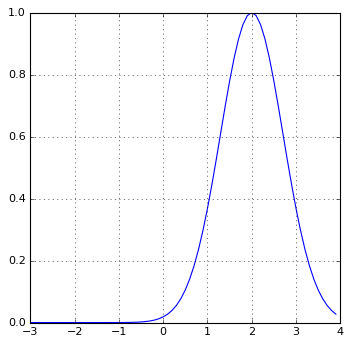

In [29]:
fig = plt.figure(figsize=(5,5))
plt.plot(x, func1, 'b-')
plt.grid()
plt.show()

In [10]:
N = 30

# Step 1. Choose a starting state
x_old = -2
E_old = my_func1(x_old)

# Initialise storage
pos_store = np.zeros(N)
val_store = np.zeros(N)
pos_store[0] = x_old
val_store[0] = E_old

for n in range(1,N):
    # Step 2. Choose the next move
    x_new = np.random.uniform(low=-3, high=4)
    
    # Step 3. Calculate the accpetance probability
    E_new = my_func1(x_new) # Calculate the cost/energy of the new move
    P_a = np.min([1, E_new/E_old])
    
    # Step 4. Decide whether to move or not
    if np.random.rand() < P_a:
        # Move accepted
        x_old = x_new
        E_old = E_new
    
    # Step 5. Store the move
    pos_store[n] = x_old
    val_store[n] = E_old

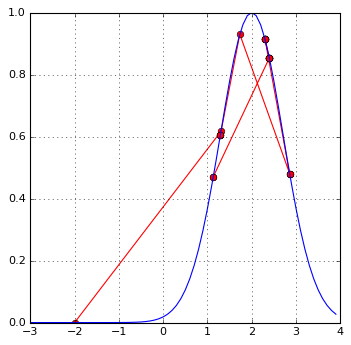

In [11]:
fig = plt.figure(figsize=(5,5))
plt.plot(pos_store, val_store, 'ro-')
plt.plot(x, pdf_true, 'b-')
plt.grid()
plt.show()

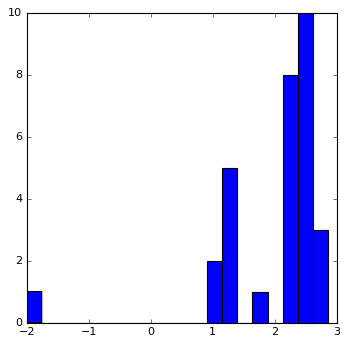

In [14]:
fig = plt.figure(figsize=(5,5))

plt.hist(pos_store, 20)
plt.show()

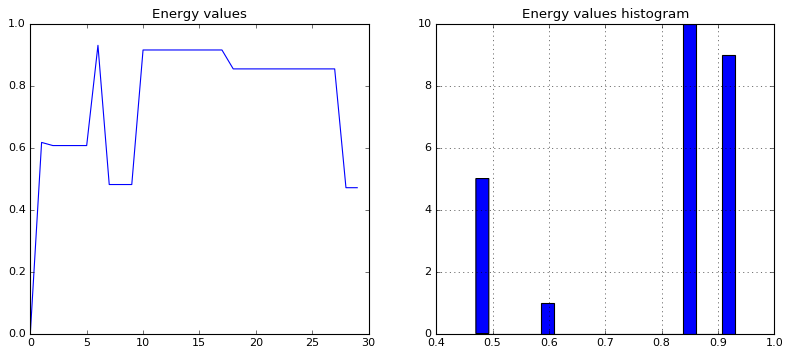

In [16]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
ax.plot(val_store)
ax.set_title("Energy values")
ax = fig.add_subplot(122)
ax.hist(val_store[5:], 20)
ax.set_title("Energy values histogram")
ax.grid()

plt.show()

# 2.0 Sampling a 2D function

In [17]:
x = np.arange(-3,4,0.1)
y = np.arange(-3,4,0.1)

X, Y = np.meshgrid(x,y)

mu_x1 = 2
sigma_x1 = 0.5
mu_y1 = 0
sigma_y1 = 0.6

func2 = np.exp(-((X-mu_x1)**2/(2*sigma_x1) + (Y-mu_y1)**2/(2*sigma_y1)))

In [18]:
Nx, Ny = func2.shape

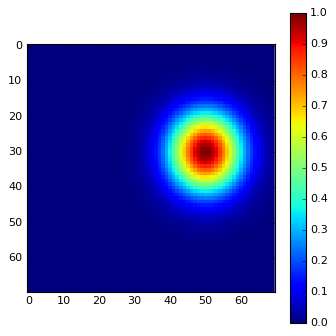

In [19]:
fig = plt.figure(figsize=(5,5))
plt.imshow(func2, interpolation='none')
plt.colorbar()
plt.show()

In [20]:
N = 100

# Step 1. Choose a starting state
x_i = np.array([5,5])
E_i = func2[x_i[1], x_i[0]] # Note the coordinate indices!!

# Initialise storage
pos_store = np.zeros([N,2])
val_store = np.zeros(N)
pos_store[0,:] = x_i
val_store[0] = E_i

for n in range(1,N):
    # Step 2. Choose the next move
#     x_j = np.array([np.random.randint(low=0,high=Nx), np.random.randint(low=0,high=Ny)])

    # Pick within a box of 20 by 20 pixels
    x_j = np.array([int(np.random.uniform(low=(x_i[0]-10), high=(x_i[0]+10))), 
                    int(np.random.uniform(low=(x_i[1]-10), high=(x_i[1]+10)))])
    x_j[x_j < 0] = 0
    x_j[x_j > Nx-1] = Nx-1     
    
    
    # Step 3. Calculate the acceptance probability
    E_j = func2[x_j[1], x_j[0]]
    Pa = np.min([1, E_j/E_i])
    
    # Step 4. Decide whether to move or not
    if np.random.rand() < Pa:
        # Move accepted
        x_i = x_j
        E_i = E_j
    
    # Step 5. Store the move
    pos_store[n,:] = x_i
    val_store[n] = E_i

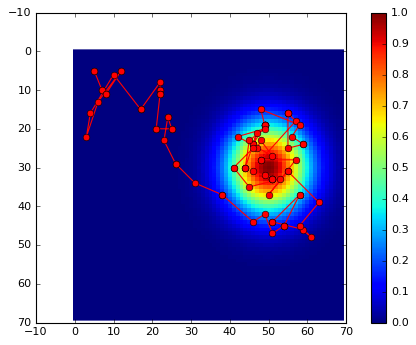

In [27]:
fig = plt.figure(figsize=(8,5))

plt.imshow(func2, interpolation='none')
plt.plot(pos_store[:,0], pos_store[:,1], 'ro-')
plt.colorbar()

plt.show()

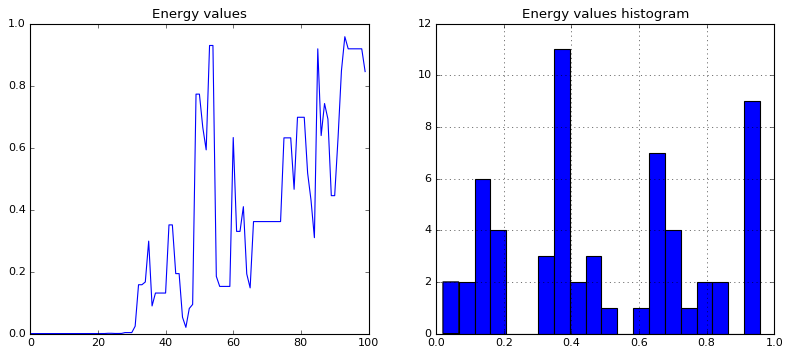

In [24]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
ax.plot(val_store)
ax.set_title("Energy values")
ax = fig.add_subplot(122)
ax.hist(val_store[40:], 20)
ax.set_title("Energy values histogram")
ax.grid()

plt.show()